The purpose of this excercise is to become familair with plotting RNA sequencing samples and generating a Matplotlib histogram with them.

In [1]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import csv

data = []
first_line = True

with open('E-MTAB-5214-query-results.tpms.tsv') as fid:
    csvfile = csv.reader(fid, delimiter= '\t')
    for line in csvfile:
        if first_line:
            names = line
            first_line = False
        else:
            data.append(line)
data = np.array(data)

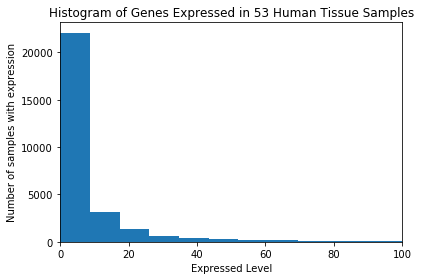

In [2]:
num_bins = 10000

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[:,2] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

The graph above is similar to the graph shown on the Expression Atlas website. However, we reduced the number of bins because our original graph was too condensed in one area. 

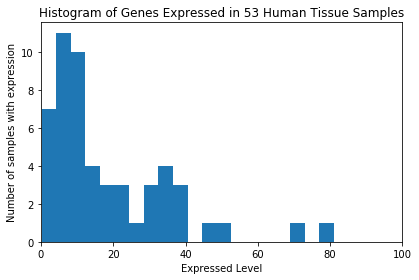

In [3]:
num_bins = 20

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[0][2:] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

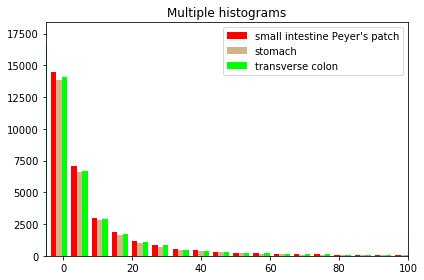

In [4]:
columns = [40,42,51]
sub = np.zeros((data.shape[0], 3))
for i in range(3):
    col = []
    for x in data[:, columns[i]]:
        if x:
            col.append(float(x))
        else:
            col.append(-10.0)
    sub[:,i] = col

num_bins = 10000
colors = ['red', 'tan', 'lime']
labels = [names[columns[i]] for i in range(3)]
fig, ax = plt.subplots()
ax.set_xlim (-5,100)
ax.hist(sub, num_bins, histtype='bar', stacked=False, color=colors, label=labels)
ax.set_title('Multiple histograms')
ax.legend(prop={'size': 10})

fig.tight_layout()
plt.show()

Batch effect: bars for different tissues have roughly the same height.

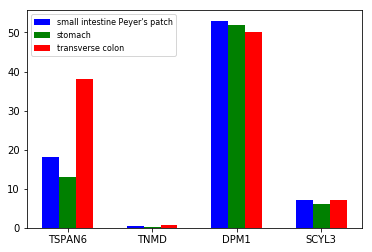

In [5]:
columns = [40,42,51]
subset = data[:4,:]
subset = subset[:,columns]
labels = [names[columns[i]] for i in range(3)]

sub = np.zeros((4, 3))
for i in range(4):
    row = []
    for x in subset[i,:]:
        if x:
            row.append(float(x))
        else:
            row.append(0.0)
    sub[i,:] = row



x = np.array([0.0, 1.0, 2.0, 3.0])


ax = plt.subplot(111)
ax.bar(x-0.4, sub[:,0],width=0.2,color='b',align='center', label=labels[0])
ax.bar(x-0.2, sub[:,1],width=0.2,color='g',align='center', label=labels[1])
ax.bar(x, sub[:,2],width=0.2,color='r',align='center', label=labels[2])
ax.legend(prop={'size': 8})
plt.xticks(x-0.2, data[:4,1])
       
plt.show()